In [1]:
import nltk
#getting csv data and converting to json
import pandas as pd
import json
df=pd.read_csv ('realdonaldtrump.csv')
import re
import nltk
from nltk.util import ngrams
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
def remove_links(x):
    x=re.sub("http.*","",x)#remove links with http
    x=re.sub("pic.*","",x)# remove pic.twitter links
    x=re.sub(".+//.*","",x)#consider s://twitter.com/realdonaldtrump/status/1272286399752855552 …
    x=re.sub(".\@.+[\s] ","",x)
    return x

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
def remove_stopwords(x):
    stop_words = set(stopwords.words("english"))#we get all stop words here
    filtered_list = []
    dicti = Counter(stop_words)
    #print("Dict is ",dicti)
    x = ' '.join([word for word in x.split() if word not in dicti])
    return x

In [3]:
def remove_punct(x):
    words=nltk.word_tokenize(x)
    for word in words:
        if word.isalnum()==False and word!='.':
            x=x.replace(word,"",1)
    return x 

In [4]:
def remove_newline(x):
    x=x.rstrip()
    x=x.strip('"')
    x=x.replace('"','')
    return x

In [5]:
def split(x):
    from sklearn.model_selection import train_test_split
    train,test=train_test_split(x,test_size=0.2,random_state=123)
    print("Train set ",len(train))
    print("test set",len(test))
    return train,test

In [6]:
def extract_ngrams(x,num):
    n_grams = ngrams(x.split(), num)
    lst=[]
    lst.append( [ ' '.join(grams) for grams in n_grams])
    full_list=[]
    for i in lst:
        for j in i:
                full_list.append(j)
    return full_list

def remove_spaces(x):
    x=x.strip()
    x=x.split()
    return ' '.join(x)

def prints(x):
    print(x)


def tokens(x):
    return word_tokenize(x)


def lemmatize(x):
    wnl=nltk.stem.WordNetLemmatizer()
    for word in x:
        w =(unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
        x.replace(word,wnl.lemmatize(w))
    return x

# CDF QUESTION

In [ ]:
#CDF
def CDF(d):
     
    prob_sum, sum_vals = 0, sum(d.values())
     
    for k, v in d.items():
 
        # Calculate the PMF of each word by dividing
        # the freq. by total of all frequencies then add
        # all the PMFs till ith word which is the CDF of
        # the ith word.
         
        pmf = v / sum_vals
        prob_sum += pmf
        d[k] = prob_sum
 
    # Return cdf dictionary
    return d

In [ ]:
# import unicodedata
import nltk
ADDITIONAL_STOPWORDS = ['rt']
def clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]
  '''  text=remove_links(text)
    text=remove_stopwords(text)
    text=remove_spaces(text)
    text=remove_punct(text)
    text=remove_newline(text)
    return lemmatize(text)'''
def get_words(df, column):
    """
    Takes in a dataframe and columns and returns a list of
    words from the values in the specified column.
    """
    return clean(''.join(str(df[column].tolist())))

def get_bigrams(df, column):
    """
    Takes in a list of words and returns a series of
    bigrams with value counts.
    """
    return (pd.Series(nltk.ngrams(get_words(df, column), 2)).value_counts())[:10]

def get_trigrams(df, column):
    """
    Takes in a list of words and returns a series of
    trigrams with value counts.
    """
    return (pd.Series(nltk.ngrams(get_words(df, column), 3)).value_counts())[:10]


def viz_bigrams(df ,column):
    get_bigrams(df, column).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title('20 Most Frequently Occuring Bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

def viz_trigrams(df, column):
    get_trigrams(df, column).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title('20 Most Frequently Occuring Trigrams')
    plt.ylabel('Trigram')
    plt.xlabel('# Occurances')
    
    
    '''
def viz_add1(token,i):
    add_1_counts(token,i).values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title('20 Most Frequently Occuring words are')
    plt.ylabel('Words')
    plt.xlabel('# Occurances')    
'''    
def add_1(token,i):
    ngrams_all = {i+1:[]}
    for each in token:
        for j in ngrams(each, i+1):
            ngrams_all[i+1].append(j)#bigraming,trigramming

    ngrams_voc = { i+1:set([])}
    for gram in ngrams_all[i+1]:
        if gram not in ngrams_voc[i+1]:
            ngrams_voc[i+1].add(gram)#making a vocabulary

    total_ngrams = { i+1:-1}
    total_voc = {i+1:-1}
    total_ngrams[i+1] = len(ngrams_all[i+1])
    total_voc[i+1] = len(ngrams_voc[i+1])                       

    ngrams_prob = {i+1:[]}
    count=1
    #we will take each gram
    #count it's probabilites 
    #and then do add 1 smoothing on it
    for ngram in ngrams_voc[i+1]:
        count=count+1



        if(count==25):#top 25 taking to increase speed
            break




        tlist = [ngram]#ngram take
        tlist.append(ngrams_all[i+1].count(ngram))#prob calculate
        ngrams_prob[i+1].append(tlist)
    for ngram in ngrams_prob[i+1]:
        ngram[-1] = (ngram[-1]+1)/(total_ngrams[i+1]+total_voc[i+1])#add 1 smoothing
    return ngrams_prob


def add_1_counts(token,i):#if we just multiply C(wn-1) in numerator we will get counts
    ngrams_all = {i+1:[]}
    for each in token:
        for j in ngrams(each, i+1):
            ngrams_all[i+1].append(j)#bigraming,trigramming

    ngrams_voc = { i+1:set([])}
    for gram in ngrams_all[i+1]:
        if gram not in ngrams_voc[i+1]:
            ngrams_voc[i+1].add(gram)#making a vocabulary
    total_ngrams = { i+1:-1}
    total_voc = {i+1:-1}
    total_ngrams[i+1] = len(ngrams_all[i+1])
    total_voc[i+1] = len(ngrams_voc[i+1])                       
    ngrams_prob = {i+1:[]}
    count=1
    #we will take each gram
    #count it's probabilites 
    #and then do add 1 smoothing on it
    for ngram in ngrams_voc[i+1]:
        count=count+1



        if(count==25):#top 25 taking to increase speed
            break




        tlist = [ngram]#ngram take
        tlist.append(ngrams_all[i+1].count(ngram))#prob calculate
        ngrams_prob[i+1].append(tlist) 
    #consider ngram is faraz ud so faraz ngram 0 will be faraz
    for ngram in ngrams_prob[i+1]:
        ngram[-1] = ((ngram[-1]+1)*(ngrams_all[i+1].count(ngram[0])))/(total_ngrams[i+1]+total_voc[i+1])
    return ngrams_prob

def perplexity(n):
    import nltk
    from nltk.lm.preprocessing import padded_everygram_pipeline
    from nltk.lm import MLE

    train_sentences = ['Be sure tune in']
    tokenized_text = [list(map(str.lower, nltk.tokenize.word_tokenize(sent))) 
                    for sent in train_sentences]
    train_data, padded_vocab = padded_everygram_pipeline(n, tokenized_text)
    model = MLE(n)
    model.fit(train_data, padded_vocab)

    test_sentences = ['Be sure tune in']
    tokenized_text = [list(map(str.lower, nltk.tokenize.word_tokenize(sent))) 
                    for sent in test_sentences]

    test_data, _ = padded_everygram_pipeline(n, tokenized_text)
    for test in test_data:
        print ("MLE Estimates:", [((ngram[-1], ngram[:-1]),model.score(ngram[-1], ngram[:-1])) for ngram in test])

    test_data, _ = padded_everygram_pipeline(n, tokenized_text)

    for i, test in enumerate(test_data):
      print("PP({0}):{1}".format(test_sentences[i], model.perplexity(test)))
    
    


# Shanon game

In [ ]:
import random
from collections import Counter
     
    

def next_word_freq(array, sentence):#array is all tokens sentence is the be 
     
   # print(type(array))
    for i in range(20):
        print(array[i])
 #print("0 is ",array[0])
   # print("0 type is ",type(array[0]))
    sen_len, word_list = len(sentence.split()), []
    
    for i in range(len(array)):
 
        # If the sentence matches the sentence in the range (i, i+x)
        # and the length is less than the length of the corpus, append
        # the word to word_list.
        #print("cond is ",' '.join(array[i : i + sen_len]).lower())#tokens
        if ' '.join(array[i : i + sen_len]).lower() == sentence.lower():
            print("if is true")
            if i + sen_len < len(array) - 1:
                word_list.append(array[i + sen_len])
 
    # Return the count of each word in word_list
    return dict(Counter(word_list))


 
def main(sent, x, n):
 
    # I am using this sample text here to illustrate the output.
    # If anyone wants to use a text file, he can use the same. The code
    # to read corpus from file has been commented below.
 
    corpus = df['content'].apply(lambda x:clean(x))

    # "temp_out" will be used to store each partial sentence
    # which will later be stored into "sent". "out" is used to store
    # the final output.

    temp_out = ''
    out = sent + ' '
    #i need every token of corpus in a list
    lst=[]
    for i in corpus:
        lst.append(i)
        
    print(type(lst))
    #now basically lst is a list of lists(sentences)
    cmplt_lst=[]
    for i in lst:
        for j in i:
            cmplt_lst.append(j)
            

    for i in range(n - x):

    # calling the next_word_freq method that returns
    # the frequency of each word next to sent in the
    # whole word corpus.

        func_out = next_word_freq(cmplt_lst, sent)#sent is be 
       # print("Func out is :",func_out)
        # cdf_dict stores the cdf of each word in the above map
        # that is calculated using method CDF.

        cdf_dict = CDF(func_out)
        #print("cdf",cdf_dict)
        # We use a random number to predict the next word.
        # The word having its CDF greater than or equal to rand
        # and less than or equal to 1.

        rand = random.uniform(0, 1)
        #print("rand is :")
        # If cdf_dict is empty, it means the word.sentence entered by you
        # does not exist in the corpus. Hence, break the loop and just print
        # the word entered by you. To implement this we use try-except block.
        # If an error occurs it implies there aren't enough values to unpack
        # and this can happen only when your input is absent from the corpus.

        try: key, val = zip(*cdf_dict.items())
        except: break

        # Iterate through the cdf values and find the smallest value
        # greater than or equal to the random number. That value is the
        # cdf of your predicted word. Add the key of the value to the output
        # string and update the "sent" variable as "temp_out".

        for j in range(len(val)):

            if rand <= val[j]:
                pos = j
                break
        #print("Pos is ",pos)
        temp_out = key[pos]
        #print("Tmp out is :",temp_out)
        out = out + temp_out + ' '
        sent = temp_out
    print("out is:")
    print(out, end = '\n\n')



Train set  34681
test set 8671
BIGRAMS :
(donald, trump)     1190
(fake, news)         695
(america, great)     605
(make, america)      566
(united, state)      561
(mr, trump)          529
(run, president)     426
(new, york)          424
(last, night)        403
(great, job)         386
dtype: int64
trigrams:
(make, america, great)               499
(fake, news, medium)                 193
(crooked, hillary, clinton)          129
(donald, j, trump)                   122
(complete, total, endorsement)       110
(please, run, president)             102
(new, york, time)                    101
(realdonaldtrump, run, president)     98
(think, like, champion)               91
(realdonaldtrump, please, run)        81
dtype: int64


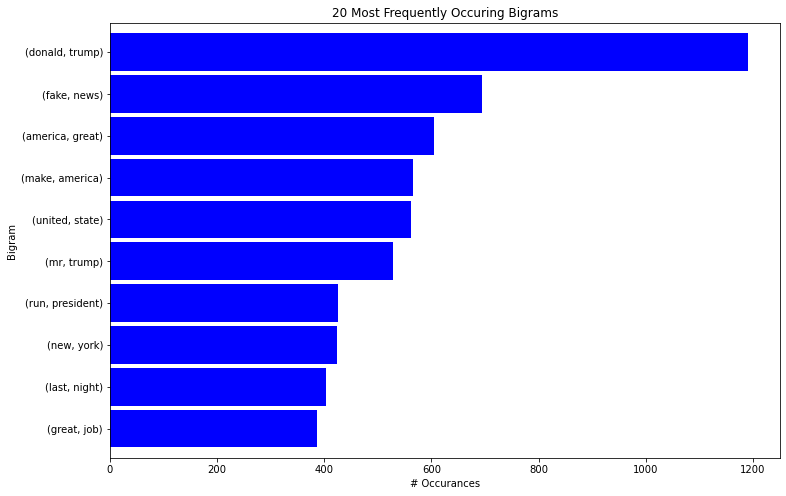

In [8]:
if __name__ == "__main__":
  #  df['content'] = df['content'].apply(lambda x:remove_links(x))
  #  print("After links removal\n",df['content'])
  #  df['content']=df['content'].apply(lambda x:remove_punct(x))
  #  print("\n \n \n Remove punct marks\n",df['content'])
  #  df['content']=df['content'].apply(lambda x:remove_stopwords(x))
  #  print("\n \n \n remove stopwords\n",df['content'])
  #  df['content']=df['content'].apply(lambda x:remove_newline(x))
  #  print("\n \n \n remove newline\n",df['content'])
 #   df['content']=df['content'].apply(lambda x:remove_spaces(x))
    train,test=split(df['content'])
    #unigram=df['content'].apply(lambda x:extract_ngrams(x,1))
    #print("Apply tokens")
    #tokenize=df['content'].apply(lambda x:tokens(x))
    
    print("BIGRAMS :")
    print(get_bigrams(df,'content'))
    
    print("trigrams:")
    print(get_trigrams(df,'content'))
    
    viz_bigrams(df, 'content')

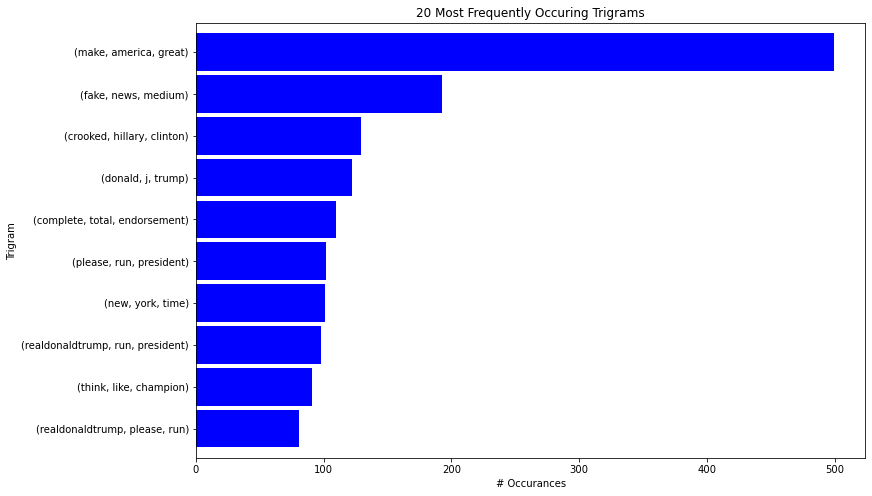

In [9]:
    viz_trigrams(df,'content')

In [10]:
#add 1 smoothing
#but let's just do it for top 20

import operator
i=1#i=1 represents it will be bigram
token=df['content'].apply(lambda x:clean(x))
bigram_add1=add_1(token,i)
print("1 count of bi")
bicounts=add_1_counts(token,i)
print(bicounts)
print("\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ")
i=2
trigram_add1=add_1(token,i)
print("1 count of tri")
tricounts=add_1_counts(token,i)
print(tricounts)
print("\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ")
sorted_big=sorted(bigram_add1.items(), key=operator.itemgetter(1))
sorted_tig=sorted(trigram_add1.items(), key=operator.itemgetter(1))

#dict.values list of lists(tuple,value)
dictionary={'bigram':sorted_big,'trigram':sorted_tig}

for lists in dictionary.values():
    print(lists,end="\n")
    
    
#replot the bicounts and tricounts



1 count of bi
{2: [[('confinement', 'awaits'), 2.697158947622522e-06], [('discretionary', 'spending'), 2.697158947622522e-06], [('nonunion', 'member'), 2.697158947622522e-06], [('absolute', 'offer'), 8.091476842867566e-06], [('college', 'like'), 2.697158947622522e-06], [('american', 'greatness'), 1.6182953685735132e-05], [('mboyle1', 'exclusive'), 2.6971589476225217e-05], [('annually', 'weekend'), 2.697158947622522e-06], [('great', 'looking'), 9.709772211441078e-05], [('he', 'fast'), 2.697158947622522e-06], [('people', 'often'), 2.697158947622522e-06], [('makeamericagreatagai', 'pictwittercomit7papsmwv'), 2.697158947622522e-06], [('bfb123456', 'trumpiowa'), 2.697158947622522e-06], [('completely', 'biased'), 2.697158947622522e-06], [('never', 'forgot'), 2.697158947622522e-06], [('even', 'easily'), 2.697158947622522e-06], [('corrupt', 'take'), 2.697158947622522e-06], [('popular', 'guy'), 2.697158947622522e-06], [('work', 'solution'), 8.091476842867566e-06], [('hillaryclinton', 'failed'),

In [11]:
print(add_1_counts(token,1))
#viz_add1(token,1)

{2: [[('confinement', 'awaits'), 2.697158947622522e-06], [('discretionary', 'spending'), 2.697158947622522e-06], [('nonunion', 'member'), 2.697158947622522e-06], [('absolute', 'offer'), 8.091476842867566e-06], [('college', 'like'), 2.697158947622522e-06], [('american', 'greatness'), 1.6182953685735132e-05], [('mboyle1', 'exclusive'), 2.6971589476225217e-05], [('annually', 'weekend'), 2.697158947622522e-06], [('great', 'looking'), 9.709772211441078e-05], [('he', 'fast'), 2.697158947622522e-06], [('people', 'often'), 2.697158947622522e-06], [('makeamericagreatagai', 'pictwittercomit7papsmwv'), 2.697158947622522e-06], [('bfb123456', 'trumpiowa'), 2.697158947622522e-06], [('completely', 'biased'), 2.697158947622522e-06], [('never', 'forgot'), 2.697158947622522e-06], [('even', 'easily'), 2.697158947622522e-06], [('corrupt', 'take'), 2.697158947622522e-06], [('popular', 'guy'), 2.697158947622522e-06], [('work', 'solution'), 8.091476842867566e-06], [('hillaryclinton', 'failed'), 2.69715894762

In [12]:
#viz_add1(token,2)

In [13]:
#perplexity calculat
print("for unigram")
perplexity(1)
print("for biigram")
perplexity(2)
print("for trigram")
perplexity(3)
print("for four gram")
perplexity(4)

for unigram
MLE Estimates: [(('be', ()), 0.25), (('sure', ()), 0.25), (('tune', ()), 0.25), (('in', ()), 0.25)]
PP(Be sure tune in):4.0
for biigram
MLE Estimates: [(('<s>', ()), 0.16666666666666666), (('be', ()), 0.16666666666666666), (('sure', ()), 0.16666666666666666), (('tune', ()), 0.16666666666666666), (('in', ()), 0.16666666666666666), (('</s>', ()), 0.16666666666666666), (('be', ('<s>',)), 1.0), (('sure', ('be',)), 1.0), (('tune', ('sure',)), 1.0), (('in', ('tune',)), 1.0), (('</s>', ('in',)), 1.0)]
PP(Be sure tune in):2.6573339529417668
for trigram
MLE Estimates: [(('<s>', ()), 0.25), (('<s>', ()), 0.25), (('be', ()), 0.125), (('sure', ()), 0.125), (('tune', ()), 0.125), (('in', ()), 0.125), (('</s>', ()), 0.25), (('</s>', ()), 0.25), (('<s>', ('<s>',)), 0.5), (('be', ('<s>',)), 0.5), (('sure', ('be',)), 1.0), (('tune', ('sure',)), 1.0), (('in', ('tune',)), 1.0), (('</s>', ('in',)), 1.0), (('</s>', ('</s>',)), 1.0), (('be', ('<s>', '<s>')), 1.0), (('sure', ('<s>', 'be')), 1.0),

In [14]:
#last 2 questions
df['content'].apply(lambda x:clean(x))
inp_sent = 'sure'
# The output will have 10 words, including the input sentence/word.
main(inp_sent, len(inp_sent), 10)
     

<class 'list'>
sure
tune
watch
donald
trump
late
night
david
letterman
present
top
ten
list
tonight
donald
trump
appearing
view
tomorrow
morning
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is true
if is tr